In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for obviously figures kidding
%matplotlib inline

In [2]:
# read all the data from the names

words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [14]:
# build the vocabulary of characters and mapping to/from integers 

chars = sorted(set("".join(words)))

stoi = {s:i+1 for i,s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


#### We are going to follow the Bengio MLP paper 2003 (https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

In [226]:
# build the dataset 

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:
    print(w)
    context = [0] * block_size
    
    for ch in w + ".":
        index = stoi[ch]
        X.append(context)
        Y.append(index)
        print("".join(itos[i] for i in context), '--->', itos[index])
        context = context[1:] + [index] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)
        

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [17]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [27]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [19]:
#building lookup table C according to the paper

""" in paper they have embed 17000 words in 30 dimensonal space we have to do something similar so we are 
 embedding 27 words in somewhat 2 dimensional embeddings"""
C = torch.randn((27, 2))

In [26]:
C

tensor([[ 0.5663,  1.4493],
        [-0.1540,  0.7652],
        [ 0.2312,  0.2028],
        [-0.3509,  0.9301],
        [-0.4913, -0.1498],
        [ 1.4252, -1.3235],
        [ 1.4126,  0.2786],
        [-0.2925,  0.2125],
        [ 1.3941, -0.4849],
        [ 1.1180,  0.5706],
        [ 0.9935, -1.0333],
        [-1.2777,  0.8449],
        [-1.8361,  0.6212],
        [ 1.9288, -0.6171],
        [-1.9805, -0.1902],
        [ 0.6201, -1.0412],
        [ 0.7796,  0.8651],
        [ 0.5022,  0.0539],
        [-0.5302, -0.7019],
        [ 0.1714, -0.6367],
        [-0.8148, -0.5858],
        [ 0.4796, -0.5771],
        [-0.5374,  0.3974],
        [-0.2960,  0.3873],
        [ 0.5488, -0.9545],
        [-1.1822,  1.1971],
        [-0.7106, -1.9700]])

In [21]:
C[5]

tensor([ 1.4252, -1.3235])

In [24]:
# what we did in previous makeover lecture is we encode these using one hot vector and matrix multiplied with the
# 5th row which is going to be 1

F.one_hot(torch.tensor(5), num_classes= 27).float() @ C

# .float because it gives long(int64) as output and for matrix multiplicaiton we need flaoat

tensor([ 1.4252, -1.3235])

In [30]:
# indexing in python is powerful, we can index X in C

# we can get the row 5,6,7 from C

C[[5,6,7]]

tensor([[ 1.4252, -1.3235],
        [ 1.4126,  0.2786],
        [-0.2925,  0.2125]])

In [33]:
# indexing can be done on tensors as well not only on list

C[torch.tensor([5,6,7])]

tensor([[ 1.4252, -1.3235],
        [ 1.4126,  0.2786],
        [-0.2925,  0.2125]])

In [34]:
# we can ge the copies of those row in it too


C[torch.tensor([5,6,6,7,7])]

tensor([[ 1.4252, -1.3235],
        [ 1.4126,  0.2786],
        [ 1.4126,  0.2786],
        [-0.2925,  0.2125],
        [-0.2925,  0.2125]])

In [44]:
# we can get 2 D indexing as well, here we can see than C is index on 2D tensor also

C[torch.tensor([[5,6,7],[5,6,7]])]

tensor([[[ 1.4252, -1.3235],
         [ 1.4126,  0.2786],
         [-0.2925,  0.2125]],

        [[ 1.4252, -1.3235],
         [ 1.4126,  0.2786],
         [-0.2925,  0.2125]]])

In [45]:
# so we can index on X as well 
C[X]

tensor([[[ 0.5663,  1.4493],
         [ 0.5663,  1.4493],
         [ 0.5663,  1.4493]],

        [[ 0.5663,  1.4493],
         [ 0.5663,  1.4493],
         [ 1.4252, -1.3235]],

        [[ 0.5663,  1.4493],
         [ 1.4252, -1.3235],
         [ 1.9288, -0.6171]],

        [[ 1.4252, -1.3235],
         [ 1.9288, -0.6171],
         [ 1.9288, -0.6171]],

        [[ 1.9288, -0.6171],
         [ 1.9288, -0.6171],
         [-0.1540,  0.7652]],

        [[ 0.5663,  1.4493],
         [ 0.5663,  1.4493],
         [ 0.5663,  1.4493]],

        [[ 0.5663,  1.4493],
         [ 0.5663,  1.4493],
         [ 0.6201, -1.0412]],

        [[ 0.5663,  1.4493],
         [ 0.6201, -1.0412],
         [-1.8361,  0.6212]],

        [[ 0.6201, -1.0412],
         [-1.8361,  0.6212],
         [ 1.1180,  0.5706]],

        [[-1.8361,  0.6212],
         [ 1.1180,  0.5706],
         [-0.5374,  0.3974]],

        [[ 1.1180,  0.5706],
         [-0.5374,  0.3974],
         [ 1.1180,  0.5706]],

        [[-0.5374,  0

In [46]:
C[X].shape

torch.Size([32, 3, 2])

##### so this is a 32 by 3 vector which is original shape of X after that we retrieve the embedding vector for that value from C

In [47]:
# for example take X[13, 2] -> 13 rows at 2nd colums of X 
X[13,2]

tensor(1)

In [48]:
# now if we check what are the values at C indexed X at 13 by 2 

C[X][13,2]

tensor([-0.1540,  0.7652])

In [49]:
# now if we verify at integer 1 which is given to us X[13,2] at C is same as C[X][13,2]
C[1]

tensor([-0.1540,  0.7652])

In [50]:
# so in a nutshell pytorch indexing is superpowerful now we can make our embeddings 

emb = C[X]
emb.shape

torch.Size([32, 3, 2])

##### Making hidden layers 

In [110]:
# the input size for hidden layer would be 3*2 -> 6 as we have 3 layers giving 2 dimensional embeddings 
# weights 
W1 = torch.randn((6,100)) # 100 is just assumed no of neurons
# bias
b1 = torch.randn(100)

In [111]:
# normally we do is, we take the inputs and multiply wiht weights and add the biases 

emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

""" normally we do is, we take the inputs and multiply wiht weights and add the biases  but we can't do that as shape of emb = [32,3,2] and shape of W1 = [6,100], so we have to concatenate those 3 input
 layers together and made the shape along with biases"""

In [54]:
# we have torch.cat to concatenate these layers

emb[:, 0, :] # so this is the first layer of 32 by 2 

tensor([[ 0.5663,  1.4493],
        [ 0.5663,  1.4493],
        [ 0.5663,  1.4493],
        [ 1.4252, -1.3235],
        [ 1.9288, -0.6171],
        [ 0.5663,  1.4493],
        [ 0.5663,  1.4493],
        [ 0.5663,  1.4493],
        [ 0.6201, -1.0412],
        [-1.8361,  0.6212],
        [ 1.1180,  0.5706],
        [-0.5374,  0.3974],
        [ 0.5663,  1.4493],
        [ 0.5663,  1.4493],
        [ 0.5663,  1.4493],
        [-0.1540,  0.7652],
        [ 0.5663,  1.4493],
        [ 0.5663,  1.4493],
        [ 0.5663,  1.4493],
        [ 1.1180,  0.5706],
        [ 0.1714, -0.6367],
        [-0.1540,  0.7652],
        [ 0.2312,  0.2028],
        [ 1.4252, -1.3235],
        [-1.8361,  0.6212],
        [ 0.5663,  1.4493],
        [ 0.5663,  1.4493],
        [ 0.5663,  1.4493],
        [ 0.1714, -0.6367],
        [ 0.6201, -1.0412],
        [ 0.7796,  0.8651],
        [ 1.3941, -0.4849]])

In [59]:
# now we need to concatenate all these 3 layers from emb 

torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

## [emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]] this is sequence of all the 3 layers and 
#1 is the dimension we need to concatenate towards


torch.Size([32, 6])

""" but the above code would not generalize if we change the block size from 3 to 5 or some other number then we have to manually add these layers and concatenate them"""

In [61]:
# solution to that problem we have torch.unbind fucniton which will unbind these layers and then we can concatenate them

# torch.unbind(input, dim=0) → seq

torch.unbind(emb, 1)

(tensor([[ 0.5663,  1.4493],
         [ 0.5663,  1.4493],
         [ 0.5663,  1.4493],
         [ 1.4252, -1.3235],
         [ 1.9288, -0.6171],
         [ 0.5663,  1.4493],
         [ 0.5663,  1.4493],
         [ 0.5663,  1.4493],
         [ 0.6201, -1.0412],
         [-1.8361,  0.6212],
         [ 1.1180,  0.5706],
         [-0.5374,  0.3974],
         [ 0.5663,  1.4493],
         [ 0.5663,  1.4493],
         [ 0.5663,  1.4493],
         [-0.1540,  0.7652],
         [ 0.5663,  1.4493],
         [ 0.5663,  1.4493],
         [ 0.5663,  1.4493],
         [ 1.1180,  0.5706],
         [ 0.1714, -0.6367],
         [-0.1540,  0.7652],
         [ 0.2312,  0.2028],
         [ 1.4252, -1.3235],
         [-1.8361,  0.6212],
         [ 0.5663,  1.4493],
         [ 0.5663,  1.4493],
         [ 0.5663,  1.4493],
         [ 0.1714, -0.6367],
         [ 0.6201, -1.0412],
         [ 0.7796,  0.8651],
         [ 1.3941, -0.4849]]),
 tensor([[ 0.5663,  1.4493],
         [ 0.5663,  1.4493],
         [ 1

In [67]:
# now we have 3 tensors unbinded and now we can concaternate them

# so we unbind all the layers from emb across 1st dimension and concatenate these individual layers across 1st dim


# this is inefficient as it creates a whole new memory to concatenate these layerss
torch.cat(torch.unbind(emb,1),1).shape # this is general for any size of block size

torch.Size([32, 6])

###### Torch.view a effective way to learn more about tensor storage in pytorch

In [81]:
# this is one way another way we can use torch.view

# for example
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [87]:
a.shape # here it is a single dimension tenosr of 18 columns but using view we can see it anyway
print(a.shape)
c = a.view(6,3) # here it is a 2D tensor
print(c)
d = a.view(3,3,2)
print(d)

torch.Size([18])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]])
tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])


In [88]:
# thsi is how tensor are stored and through the help of strides we interpret them as multidimensional
# more about this is in the blog = http://blog.ezyang.com/2019/05/pytorch-internals/

a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [89]:
emb.shape

torch.Size([32, 3, 2])

In [90]:
# we can just simply ask pytorch to view the tensor as [32,6]
emb.view(32,6)

tensor([[ 0.5663,  1.4493,  0.5663,  1.4493,  0.5663,  1.4493],
        [ 0.5663,  1.4493,  0.5663,  1.4493,  1.4252, -1.3235],
        [ 0.5663,  1.4493,  1.4252, -1.3235,  1.9288, -0.6171],
        [ 1.4252, -1.3235,  1.9288, -0.6171,  1.9288, -0.6171],
        [ 1.9288, -0.6171,  1.9288, -0.6171, -0.1540,  0.7652],
        [ 0.5663,  1.4493,  0.5663,  1.4493,  0.5663,  1.4493],
        [ 0.5663,  1.4493,  0.5663,  1.4493,  0.6201, -1.0412],
        [ 0.5663,  1.4493,  0.6201, -1.0412, -1.8361,  0.6212],
        [ 0.6201, -1.0412, -1.8361,  0.6212,  1.1180,  0.5706],
        [-1.8361,  0.6212,  1.1180,  0.5706, -0.5374,  0.3974],
        [ 1.1180,  0.5706, -0.5374,  0.3974,  1.1180,  0.5706],
        [-0.5374,  0.3974,  1.1180,  0.5706, -0.1540,  0.7652],
        [ 0.5663,  1.4493,  0.5663,  1.4493,  0.5663,  1.4493],
        [ 0.5663,  1.4493,  0.5663,  1.4493, -0.1540,  0.7652],
        [ 0.5663,  1.4493, -0.1540,  0.7652, -0.5374,  0.3974],
        [-0.1540,  0.7652, -0.5374,  0.3

In [91]:
# we can also verify the results

emb.view(32,6) == torch.cat(torch.unbind(emb,1),1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [112]:
# now if we come back to the multiplications 

# hidden states, h -> hidden layer of activation use tanh in the paper (the numbers will be between -1 to 1 coz of tanh)
#  X @ W + b    with tanh activation
h =  torch.tanh(emb.view(32,6) @ W1 + b1) 


In [113]:
h.shape

torch.Size([32, 100])

In [103]:
## this is for understanding and best coding practices

'''we have hardcoded the 32 -> 
one way is we put emb.shape[0] or 
another way is we put -1( in this torch will automatically figure out the shape)'''

print(f'-> {(emb.view(emb.shape[0], 6) @ W1 + b1).shape}')
print(f'-> {(emb.view(-1, 6)@ W1 + b1).shape}')

-> torch.Size([32, 100])
-> torch.Size([32, 100])


In [114]:
h

tensor([[ 1.0000,  0.9565, -0.9840,  ..., -0.9364, -0.8814, -0.8158],
        [ 0.9998, -0.8505, -0.9995,  ..., -0.1457,  0.9612,  0.9696],
        [-0.9697,  0.9827, -0.9994,  ..., -1.0000,  0.9991,  1.0000],
        ...,
        [ 0.9731, -0.9559,  0.9849,  ...,  0.9270,  0.2331,  0.9996],
        [ 0.4353,  0.9680, -0.9643,  ..., -1.0000,  0.8227,  0.9996],
        [ 0.9340, -0.9637,  0.5387,  ...,  0.6683, -0.7041,  0.2378]])

In [115]:
h.shape

torch.Size([32, 100])

#### Final Layer

In [116]:
# the input size for hidden layer would be 100

W2 = torch.randn((100,27))
# bias
b2 = torch.randn(27)

In [118]:
logits = h @ W2 + b2

In [119]:
logits.shape

torch.Size([32, 27])

In [121]:
counts = logits.exp()

In [122]:
probs = counts / counts.sum(1, keepdims= True)

In [124]:
probs.shape

torch.Size([32, 27])

In [125]:
probs[0].sum()

tensor(1.0000)

In [127]:
# now we grab the assigned probs based on the Y given to us by above neuralnet without training

probs[torch.arange(32), Y]

tensor([2.5160e-06, 5.0468e-08, 9.4913e-16, 4.2556e-10, 1.8539e-09, 1.6902e-06,
        4.3396e-09, 6.4010e-09, 3.0317e-01, 2.8690e-11, 6.1598e-10, 1.1701e-08,
        3.8621e-03, 1.4933e-04, 2.4820e-06, 3.2776e-09, 4.2421e-09, 4.8460e-11,
        4.0399e-10, 4.4234e-03, 1.8438e-08, 1.1938e-04, 1.8784e-07, 6.2564e-07,
        4.7296e-04, 1.1597e-10, 7.7712e-03, 9.7319e-08, 2.0010e-06, 3.0559e-02,
        3.4230e-13, 1.1424e-10])

In [129]:
# loss as we did in previous video

loss = -probs[torch.arange(32), Y].log().mean()
loss

tensor(16.1114)

In [130]:
# --------------------     write it all more concisely and respectfully ------------------#

In [227]:
X.shape, Y.shape #dataset

(torch.Size([32, 3]), torch.Size([32]))

In [172]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator = g)
W1 = torch.randn((6, 100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100,27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [148]:
sum(p.nelement() for p in parameters) # no of parameters in total

3481

In [143]:
emb = C[X] # [32, 3, 2]
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32,100)
logits = h @ W2 + b2
counts = logits.exp()
probs = counts / counts.sum(1, keepdims= True)
loss = -probs[torch.arange(32), Y].log().mean()
loss

tensor(17.7697)

In [144]:
# the counts, probs, and loss line is equivalent to cross entropy loss 

loss = F.cross_entropy(logits, Y)

tensor(17.7697)

In [149]:
# so it should be like this


emb = C[X] # [32, 3, 2]
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32,100)
logits = h @ W2 + b2
# counts = logits.exp()
# probs = counts / counts.sum(1, keepdims= True)
# loss = -probs[torch.arange(32), Y].log().mean()
loss = F.cross_entropy(logits, Y)
loss

tensor(17.7697)

#### why to use cross entropy and not calculate loss on our own 

''' Because - 
1) the forward and backward pass can be much more efficient
2) the numerical calculation will be much more well behaved
'''



In [160]:
## example of 2nd reason why numerical calculation will be much more well behaved in cross-entropy
##### Case 1
logits = torch.tensor([-5,-2,0,5])
counts = logits.exp()
probs = counts / counts.sum()
print("case 1",probs)
print("case 1", probs.sum())
print("case 1 counts", counts)
# so here it is fine aalso the sujm of the probs will be 1 too 

##### Case 2 ---- if logits have very negative number 
logits = torch.tensor([-500,-2,0,5])
counts = logits.exp()
probs = counts / counts.sum()
print("case 2",probs)
print("case 2", probs.sum())
print("case 2 counts", counts)
# it is fine in case 2 as well but what if we have a very positive number in logits 


##### Case 3 ---- if logits have very positive number 
logits = torch.tensor([-500,-2,0,100])
counts = logits.exp()
probs = counts / counts.sum()
print("case 3",probs)
print("case 3", probs.sum())
print("case 3 counts", counts)
# in case 3 it becomes nan as logits.exp(500) is coming to be infinte, it surpasses the range of flaoting numbers

case 1 tensor([4.5053e-05, 9.0492e-04, 6.6865e-03, 9.9236e-01])
case 1 tensor(1.)
case 1 counts tensor([6.7379e-03, 1.3534e-01, 1.0000e+00, 1.4841e+02])
case 2 tensor([0.0000e+00, 9.0496e-04, 6.6868e-03, 9.9241e-01])
case 2 tensor(1.)
case 2 counts tensor([0.0000e+00, 1.3534e-01, 1.0000e+00, 1.4841e+02])
case 3 tensor([0., 0., 0., nan])
case 3 tensor(nan)
case 3 counts tensor([0.0000, 0.1353, 1.0000,    inf])


In [167]:
# as we have seen above that very positive numbers can break our loss calculation

#### What happens in cross_entropy in the same case -- ? 

"""
In pytorch it takes the max positive number of the logits and subtract it with the logists which 
didnt impact the probabilities and keep it safe from going to inf 
"""

## what it does - visualization
##### Case 1
logits = torch.tensor([-5,-2,0,100])
counts = logits.exp()
probs = counts / counts.sum()
print("case 1",probs)
print("case 1", probs.sum())
print("case 1 counts", counts)


##### Case 2 
logits = torch.tensor([-5,-2,0,100]) - 100
counts = logits.exp()
probs = counts / counts.sum()
print("case 2",probs)
print("case 2", probs.sum())
print("case 2 counts", counts)
# it is fine now if we subtract the max from the logits



case 1 tensor([0., 0., 0., nan])
case 1 tensor(nan)
case 1 counts tensor([0.0067, 0.1353, 1.0000,    inf])
case 2 tensor([0.0000e+00, 5.6052e-45, 3.7835e-44, 1.0000e+00])
case 2 tensor(1.)
case 2 counts tensor([0.0000e+00, 5.6052e-45, 3.7835e-44, 1.0000e+00])


                    #### Collecting everything -> forward and backward pass

In [174]:
# requires grad for parameters to be true 

for p in parameters:
    p.requires_grad = True

In [176]:
# now collecting forward pass and backward pass
for _ in range(1000):
    
    # forward pass 
    emb = C[X] # [32,3,2]
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(32,100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y)
    

    # backward pass 
    for p in parameters:
        p.grad = None

    loss.backward()

    #update
    for p in parameters:
        p.data += -0.1 * p.grad
print(loss.item())


0.2560828924179077


In [183]:
#### why loss is so low and why it is so straight forward ? 

"""
The reason is this is so straight forward is that we are overfitting 32 examples of 1st 5 words on 3482 parameters
therefore it is very easy for the neural net to fit these 32 examples over these many parameters
This is called "overfitting", for single batch of data
"""

#### Q why we are not able to achieve zero loss?
"""
fundamentally in X-> "..." need to predict [e/o/a/i/s] so because of this case we are not able to get
zero loss as some of the predictions are not correct

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .
"""


In [177]:
logits.max(1) # looking for the max along the 1st dimension

torch.return_types.max(
values=tensor([13.3422, 17.8072, 20.6086, 20.6228, 16.7472, 13.3422, 16.0096, 14.1820,
        15.9244, 18.3747, 15.9526, 20.9386, 13.3422, 17.1231, 17.1447, 20.0735,
        13.3422, 16.5999, 15.1165, 17.0717, 18.5967, 15.9804, 10.8856, 10.6975,
        15.5135, 13.3422, 16.1899, 16.9852, 12.7504, 16.2093, 19.0982, 16.0355],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [178]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

"""we can see that at 0th place indices are differ from Y 0th index ie why we have mismatched prediction because of ... have too many chars to predict so that is we have do not have zero loss """

### Now we run the neural net for whole dataset

In [235]:
# build the dataset 

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
#     print(w)
    context = [0] * block_size
    
    for ch in w + ".":
        index = stoi[ch]
        X.append(context)
        Y.append(index)
#         print("".join(itos[i] for i in context), '--->', itos[index])
        context = context[1:] + [index] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)
        

In [236]:
X.shape, Y.shape #dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [237]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator = g)
W1 = torch.randn((6, 100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100,27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [238]:
sum(p.nelement() for p in parameters)

3481

In [239]:
# requires grad for parameters to be true 

for p in parameters:
    p.requires_grad = True

In [198]:
# now collecting forward pass and backward pass
for _ in range(10):
    
    # forward pass 
    emb = C[X] # [228146,3,2]
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(228146,100)
    logits = h @ W2 + b2 # (228146, 27)
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    
    # backward pass 
    for p in parameters:
        p.grad = None

    loss.backward()

    #update
    for p in parameters:
        p.data += -0.1 * p.grad



10.709586143493652
10.407632827758789
10.127808570861816
9.86436653137207
9.614505767822266
9.37644100189209
9.148946762084961
8.931113243103027
8.722232818603516
8.52175235748291


#### we can observe that it is slow ass we are doing alot of backward and forward for 228146 datasize in updating the weights
"""
What we do mostly is we create minibatches and then update those weights for that mini batch

"""



In [202]:
torch.randint(0, 5, (32,)) # generating 32 size random nos from 0-5

tensor([2, 3, 1, 1, 1, 3, 2, 0, 4, 3, 1, 4, 0, 2, 4, 0, 1, 0, 0, 4, 0, 4, 2, 0,
        2, 4, 2, 2, 3, 1, 1, 1])

In [203]:
# these are going to be the index of minibatches

torch.randint(0, X.shape[0], (32,)) # generating 32 size Xshape nos from 0-5

tensor([ 41539, 223194, 195217,  34460, 111120,   4131, 201537,  33303,  80955,
        201100, 126410,  83383, 178053, 156430, 204958, 133041, 150429,  66573,
        180998,  19105,  17416, 172086, 195422,  59440, 218847, 162776,  23828,
         94555, 148143, 219880, 143571,  37840])

In [212]:
# now collecting forward pass and backward pass with minibatch
for _ in range(100): 
    
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    # forward pass 
    emb = C[X[ix]] # [228146,3,2]
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(228146,100)
    logits = h @ W2 + b2 # (228146, 27)
    loss = F.cross_entropy(logits, Y[ix])

    
    # backward pass 
    for p in parameters:
        p.grad = None

    loss.backward()

    #update
    for p in parameters:
        p.data += -0.1 * p.grad
print(loss.item())

2.461575746536255


"""
Now we are dealing with minibatches the quality of the gradient is lower, we can say it is not reliable to a gradient direction but gradient direction is good enough if it only estimating through 32 batch size examples that it is useful. 

It is much better to have approximate gradient and make more steps then to evaluate the exact gradient and take fewer steps so that is why it works quite well in practice."""


In [214]:
# overall loss just checking here---
emb = C[X] # [228146,3,2]
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(228146,100)
logits = h @ W2 + b2 # (228146, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.8203, grad_fn=<NllLossBackward0>)

#### Finding a good learning rate 

In [215]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [233]:
# now we use this dynamic lr to find the best lr for this
# rerunnning the weights again here from top-

lri = []
lossi = []

for i in range(1000): 
    
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    # forward pass 
    emb = C[X[ix]] # [228146,3,2]
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(228146,100)
    logits = h @ W2 + b2 # (228146, 27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())

    
    # backward pass 
    for p in parameters:
        p.grad = None

    loss.backward()
    
    #dynamic lr
    lr = lrs[i]
    
    #update
    for p in parameters:
        p.data += -lr * p.grad
        
        
    # track stats
    lri.append(lre[i])
    lossi.append(loss.item())
# print(loss.item())


19.01653480529785
18.71354103088379
18.35076141357422
18.91163444519043
20.735458374023438
17.23101806640625
19.903057098388672
20.05885124206543
20.919992446899414
19.128625869750977
21.48160171508789
17.306936264038086
20.156248092651367
16.05809783935547
19.012575149536133
18.006879806518555
19.361888885498047
18.11344337463379
18.394512176513672
16.23164176940918
16.142356872558594
19.84491729736328
14.889447212219238
19.338973999023438
17.337345123291016
19.42704963684082
21.918087005615234
18.050474166870117
19.43299674987793
17.456573486328125
19.318618774414062
18.081993103027344
19.380556106567383
20.608856201171875
17.676414489746094
16.791431427001953
17.88814353942871
18.088010787963867
18.91673469543457
17.560426712036133
20.014402389526367
14.547139167785645
17.448017120361328
18.73333740234375
16.383102416992188
16.039085388183594
18.370023727416992
19.934188842773438
17.01706886291504
17.103496551513672
20.252086639404297
15.364550590515137
17.684389114379883
21.0437316

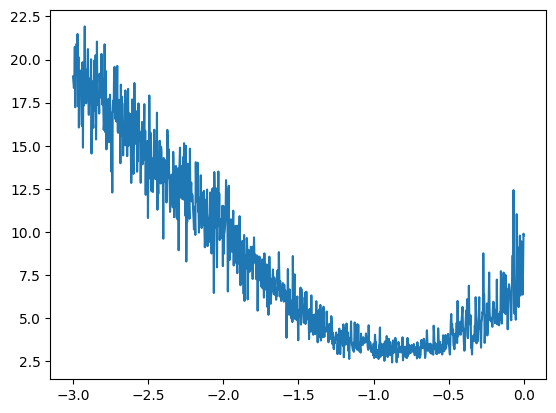

In [234]:
plt.plot(lri, lossi)

#### now we can see that a decent lr is somewhere near 10**(-1.0) which is 0.1 what we were using it previously but we can observer that too loss is increasing on high lr(1) and starts decreasing from (0.001) lr--the best can be observed across (0.1)

In [248]:
# reruning now with the 0.1 lr and for no of iterations

# rerunnning the weights again here from top-

lri = []
lossi = []

for i in range(10000): 
    
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    # forward pass 
    emb = C[X[ix]] # [228146,3,2]
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(228146,100)
    logits = h @ W2 + b2 # (228146, 27)
    loss = F.cross_entropy(logits, Y[ix])
#     print(loss.item())

    
    # backward pass 
    for p in parameters:
        p.grad = None

    loss.backward()
    
    #dynamic lr
    #lr = lrs[i]
    lr = 0.01
    
    #update
    for p in parameters:
        p.data += -lr * p.grad
        
        
#     # track stats
#     lri.append(lre[i])
#     lossi.append(loss.item())
# print(loss.item())

In [249]:
#overall loss for whole dataset

emb = C[X] # [228146,3,2]
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(228146,100)
logits = h @ W2 + b2 # (228146, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3144, grad_fn=<NllLossBackward0>)

""" so above after 30000 iterations I changed the lr to 0.01 as what we do generally we start with the lr which we
found above in lr ananlysis and then train the model on that lr for a whole and then at the end we do lr decay by say factor of 10 and run it for few more iterations, then we get a trained network"""

### Splitting the data set -

training set, dev/validation set, test set
(80%, 10%,10%)



In [298]:
# build the dataset 

def build_dataset(words):
    block_size = 3 # context length: how many characters do we take to predict the next one?
    X, Y = [], []
    for w in words:
    #     print(w)
        context = [0] * block_size

        for ch in w + ".":
            index = stoi[ch]
            X.append(context)
            Y.append(index)
    #         print("".join(itos[i] for i in context), '--->', itos[index])
            context = context[1:] + [index] # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


In [299]:
len(words)

32033

In [300]:
n1 # training words

25626

In [301]:
n2

28829

In [302]:
n2-n1 # dev words 

3203

In [303]:
len(words) - n2 # test words

3204

In [304]:
Xtr.shape, Ytr.shape

(torch.Size([182437, 3]), torch.Size([182437]))

In [305]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator = g)
W1 = torch.randn((6, 100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100,27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [306]:
sum(p.nelement() for p in parameters)

3481

In [307]:
# requires grad for parameters to be true 

for p in parameters:
    p.requires_grad = True

In [317]:
# reruning now with the 0.1 lr and for no of iterations

# rerunnning the weights again here from top-

lri = []
lossi = []

for i in range(10000): 
    
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # forward pass 
    emb = C[Xtr[ix]] # [228146,3,2]
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(228146,100)
    logits = h @ W2 + b2 # (228146, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
#     print(loss.item())

    
    # backward pass 
    for p in parameters:
        p.grad = None

    loss.backward()
    
    #dynamic lr
    #lr = lrs[i]
    lr = 0.01
    
    #update
    for p in parameters:
        p.data += -lr * p.grad
        
        
#     # track stats
#     lri.append(lre[i])
#     lossi.append(loss.item())


In [318]:
print(loss.item())

2.272547960281372


In [320]:
#overall loss for training dataset

emb = C[Xtr] # [228146,3,2]
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(228146,100)
logits = h @ W2 + b2 # (228146, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3347, grad_fn=<NllLossBackward0>)

In [319]:
#overall loss for dev dataset

emb = C[Xdev] # [228146,3,2]
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(228146,100)
logits = h @ W2 + b2 # (228146, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3536, grad_fn=<NllLossBackward0>)

we can see these two losses are nearly equal so we are not overfitting, this is called underfitting as these are roughly equal this means network is very tiny means parameters are less

#### making the network bigger now, increasing no of parameters in hidden layer

In [321]:
# easiest way to do that is to pump the hidden layer neurons, we changed it from 100 to 300

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator = g)
W1 = torch.randn((6, 300), generator = g)
b1 = torch.randn(300, generator = g)
W2 = torch.randn((300,27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [322]:
sum(p.nelement() for p in parameters)

10281

In [323]:
# requires grad for parameters to be true 

for p in parameters:
    p.requires_grad = True

In [324]:
## stats variables 


lri = []
lossi = []
stepi = []

In [345]:
# reruning now with the 0.1 lr and for no of iterations

# rerunnning the weights again here from top-

for i in range(30000): 
    
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # forward pass 
    emb = C[Xtr[ix]] # [228146,3,2]
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(228146,100)
    logits = h @ W2 + b2 # (228146, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    #print(loss.item())

    
    # backward pass 
    for p in parameters:
        p.grad = None
    loss.backward()
    
    #dynamic lr
    #lr = lrs[i]
    lr = 0.01
    
    #update
    for p in parameters:
        p.data += -lr * p.grad
        
        
    # track stats
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.item())

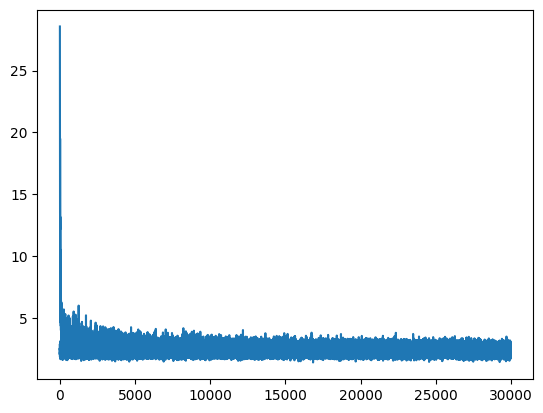

In [346]:
plt.plot(stepi, lossi)

In [347]:
#overall loss for training dataset

emb = C[Xtr] # [228146,3,2]
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(228146,100)
logits = h @ W2 + b2 # (228146, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.2342, grad_fn=<NllLossBackward0>)

In [348]:
#overall loss for dev dataset

emb = C[Xdev] # [228146,3,2]
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(228146,100)
logits = h @ W2 + b2 # (228146, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2631, grad_fn=<NllLossBackward0>)

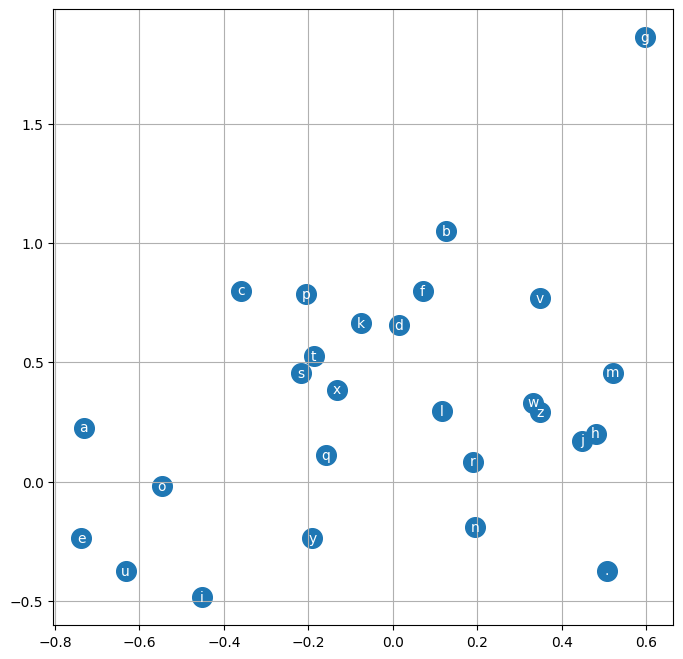

In [349]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

### as we saw that these were 2D embeddings and the loss was not improving that much so now we have to increase the size of the embedding 

#### Larger embedding size

In [369]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator = g)
W1 = torch.randn((30, 200), generator = g)
b1 = torch.randn(200, generator = g)
W2 = torch.randn((200,27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [370]:
#no of parameters
sum(p.nelement() for p in parameters)

11897

In [371]:
# requires grad for parameters to be true 

for p in parameters:
    p.requires_grad = True

In [372]:
## stats variables 

lri = []
lossi = []
stepi = []

In [373]:
for i in range(2000000): 
    
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # forward pass 
    emb = C[Xtr[ix]] # [228146,3,2]
    h = torch.tanh(emb.view(-1,30) @ W1 + b1) #(228146,100)
    logits = h @ W2 + b2 # (228146, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    #print(loss.item())

    
    # backward pass 
    for p in parameters:
        p.grad = None
    loss.backward()
    
    #dynamic lr
    #lr = lrs[i]
    lr = 0.1 if i < 1000000 else 0.01
    
    #update
    for p in parameters:
        p.data += -lr * p.grad
        
        
    # track stats
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())

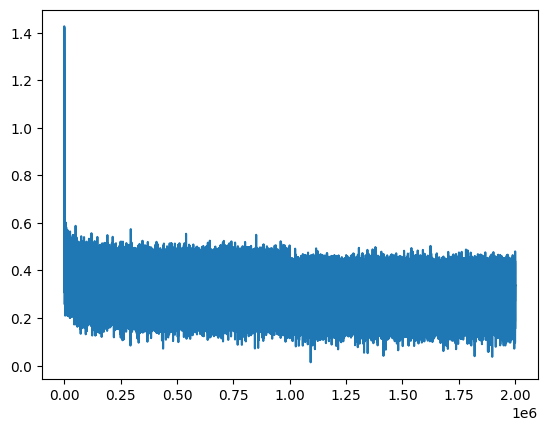

In [374]:
plt.plot(stepi, lossi)

In [375]:
#overall loss for training dataset

emb = C[Xtr] # [228146,3,2]
h = torch.tanh(emb.view(-1,30) @ W1 + b1) #(228146,100)
logits = h @ W2 + b2 # (228146, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0165, grad_fn=<NllLossBackward0>)

In [376]:
#overall loss for dev dataset

emb = C[Xdev] # [228146,3,2]
h = torch.tanh(emb.view(-1,30) @ W1 + b1) #(228146,100)
logits = h @ W2 + b2 # (228146, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1342, grad_fn=<NllLossBackward0>)

In [377]:
# sample from the model


g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context =  [0] * block_size # inintialze with all '...'
    while True:
        emb = C[torch.tensor([context])] # (1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim = 1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        
        if ix == 0:
            break
        
    
    print("".join(itos[i] for i in out))
        

carman.
amelle.
khyimilia.
atlanna.
sane.
mahnen.
delynn.
pareei.
neemari.
chaiinder.
evy.
dhymphois.
quinte.
roixes.
vid.
quinte.
madiarystin.
cecillsa.
med.
edi.
